In [102]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dataset yang akan dicari nilai sentiment

In [103]:
df_tweets = pd.read_csv('umk_tweets_202112_clean.csv')
df_tweets

,tweet,userid
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658
2,umk yo regone mundak maneh bos,1572322873
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136
4,sumpah umk malang segini iya mending nyari ker...,181023564
...,...,...
1598,ngelihat gaji dihitung make idr susah nyentuh ...,1200035940372078592
1599,umk solo rp ribu dinilai layak,2392460208
1600,bicaranya tidak sesuai kenyataan jakarta warga...,984001438408953857
1601,dikabarkan persen daftar umk provinsi banten c...,1243113157066776576


dataset untuk training model

In [104]:
df_tweets_model = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')
df_tweets_model

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


Karena masih terdapat kolom yang tidak perlu dan kita perlu mengubah kolom sentiment menjadi numerik, maka kita lakukan transformasi pada kedua dataframe

In [105]:
df_tweets_model.rename(columns={"Instagram Comment Text":"Text"}, inplace=True)
df_tweets_model.drop(columns=["Id"],inplace=True,)
df_tweets_model.replace({"Sentiment":{"negative":0, "positive":1}}, inplace=True)

In [106]:
df_tweets

,tweet,userid
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658
2,umk yo regone mundak maneh bos,1572322873
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136
4,sumpah umk malang segini iya mending nyari ker...,181023564
...,...,...
1598,ngelihat gaji dihitung make idr susah nyentuh ...,1200035940372078592
1599,umk solo rp ribu dinilai layak,2392460208
1600,bicaranya tidak sesuai kenyataan jakarta warga...,984001438408953857
1601,dikabarkan persen daftar umk provinsi banten c...,1243113157066776576


In [107]:
df_tweets_model

,Sentiment,Text
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
395,1,Bangga sama suami yg selalu ingat istri disela...
396,1,Apaoun pekerjaannya yg penting halal u tuk men...
397,1,Gojek itu mayoritas pegangguran yang lama gak ...
398,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [108]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,  seaborn as sns
import json, tweepy, requests, re, string

from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
import nltk

In [109]:
# casefolding
def case_folding(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = text.rstrip().lstrip()
    text = text.replace('   ',' ')

    return text

# tokenizing
def tokenizing(text:str):
    text_tokens = word_tokenize(text)
    return(text_tokens)

# filtering (Menghilangkan stopwords)
def remove_stopwords(text:str):
    stopwords_engine = StopWordRemoverFactory()
    stopwords = stopwords_engine.get_stop_words()
    more_stopwords = ['username'] # menambahkan stopwords

    result = []
    for word in text:
        if word not in stopwords + more_stopwords:
            result.append(word)
    return result 
    
# stemming
def stemming(text:str):
    engine = StemmerFactory()
    stemmer = engine.create_stemmer()
    text = stemmer.stem(text)

    return text

In [110]:
output1=[]

for text in df_tweets_model['Text']:
    text = case_folding(text)
    text = tokenizing(text)
    text = remove_stopwords(text)
    text = stemming(' '.join(text))
    output1.append(text)

In [111]:
output2=[]

for text in df_tweets['tweet']:
    text = case_folding(text)
    text = tokenizing(text)
    text = remove_stopwords(text)
    text = stemming(' '.join(text))
    output2.append(text)

In [112]:
df_tweets_model["clean_text"] = pd.DataFrame(data=output1)
df_tweets_model

,Sentiment,Text,clean_text
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak hubung gugur dgn pake hijab syar yg ...
1,0,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt bain balikanhadewwntar ...
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn mewek skr lengket lg duhhh labil bgt sih ...
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kesel att gausah anak kasi kembang psikis...
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan lgsakit jiwaknp yg jd peran...
...,...,...,...
395,1,Bangga sama suami yg selalu ingat istri disela...,bangga suami yg istri sela apa profesi kau jua...
396,1,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg halal tuk nafkah keluarga sema...
397,1,Gojek itu mayoritas pegangguran yang lama gak ...,gojek mayoritas pegangguran gak trus putus asa...
398,1,<USERNAME> aslinya cantik dan ayu loh mbak kr...,asli cantik ayu loh mbak krn temu sembak ramah...


In [113]:
df_tweets["clean_tweet"] = pd.DataFrame(data=output2)
df_tweets

,tweet,userid,clean_tweet
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136,umk sragen tetap rp rp sayang rendah soloraya
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658,umk kota bekas ump dki jakarta yak terobosss
2,umk yo regone mundak maneh bos,1572322873,umk yo regone mundak maneh bos
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136,umk kabupatenkota jawa resmi umum kota semaran...
4,sumpah umk malang segini iya mending nyari ker...,181023564,sumpah umk malang gin iya mending nyari malang...
...,...,...,...
1598,ngelihat gaji dihitung make idr susah nyentuh ...,1200035940372078592,ngelihat gaji hitung make idr susah nyentuh no...
1599,umk solo rp ribu dinilai layak,2392460208,umk solo rp ribu nilai layak
1600,bicaranya tidak sesuai kenyataan jakarta warga...,984001438408953857,bicara sesuai nyata jakarta warga terima akiba...
1601,dikabarkan persen daftar umk provinsi banten c...,1243113157066776576,kabar persen daftar umk provinsi banten cilego...


In [114]:
# for i in df_tweets["clean_tweet"]:
#     print(i)

## Machine Learning & Data Teks

Seperti yang kita tahu untuk dapat menggunakan sebuah model machine learning maka kita membutuhkan data dengan tipe numerik atau integer, akan tetapi salah satu satu feature yang kita miliki merupakan data teks. Nah pada kesempatan ini kita akan memanfaatkan metode perubahan data teks - matriks yang sudah kita pelajari sebelumnya, yaitu TF-IDF

Mari kita mulai, kita akan memanfaatkan metode TfidVectorizer pada library sklearn dan gaussian Naive Bayes.

In [115]:
vectorizer = TfidfVectorizer (max_features=2500)

model_g = GaussianNB()

Lalu kita ubah data text_clean kita ke dalam bentuk TFIDF Vectorizer

In [116]:
v_data = vectorizer.fit_transform(df_tweets_model['clean_text']).toarray()

In [117]:
vectorizer.fit_transform(df_tweets_model['clean_text'])

<400x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 5920 stored elements in Compressed Sparse Row format>

Setelah ini mari kita lakukan pembagian data menjadi data train dan testing lalu fit kedalam model kita.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(v_data, df_tweets_model['Sentiment'], test_size=0.2, random_state=31)

model_g.fit(X_train,y_train)

GaussianNB()

In [119]:
y_preds = model_g.predict(X_test)

In [120]:
print(confusion_matrix(y_test,y_preds))

print(classification_report(y_test,y_preds))

print('nilai akurasinya adalah ',accuracy_score(y_test, y_preds))

[[32  4]
 [ 7 37]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        36
           1       0.90      0.84      0.87        44

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80

nilai akurasinya adalah  0.8625


Nilai Akurasi, Precision, Recall, F1-Score diatas 80 menunjukkan model kita merupakan model yang cukup baik untuk kasus ini. Support yang tidak terlalu jauh juga menandakan bahwa pembagian dataset kita cukup baik. Jika suppor kita berbeda jauh bisa dicoba mengubah nilai random_state agar pembagian label 1 dan 2 lebih seimbang.

Sekarang mari kita gunakan untuk melakukan klasifikasi pada data tweet_umk yang sudah kita masukkan pada df_tweets

In [121]:
v_data = vectorizer.transform(df_tweets["clean_tweet"]).toarray()

y_classification = model_g.predict(v_data)


df_tweets["sentiment"] = list(y_classification)

In [122]:
df_tweets

,tweet,userid,clean_tweet,sentiment
0,umk sragen ditetapkan rp rp sayang terendah so...,949224511508955136,umk sragen tetap rp rp sayang rendah soloraya,1
1,umk kota bekasi ump dki jakarta yak terobosss😭,1259379786566086658,umk kota bekas ump dki jakarta yak terobosss,1
2,umk yo regone mundak maneh bos,1572322873,umk yo regone mundak maneh bos,1
3,umk kabupatenkota jawa resmi diumumkan kota se...,949224511508955136,umk kabupatenkota jawa resmi umum kota semaran...,1
4,sumpah umk malang segini iya mending nyari ker...,181023564,sumpah umk malang gin iya mending nyari malang...,0
...,...,...,...,...
1598,ngelihat gaji dihitung make idr susah nyentuh ...,1200035940372078592,ngelihat gaji hitung make idr susah nyentuh no...,0
1599,umk solo rp ribu dinilai layak,2392460208,umk solo rp ribu nilai layak,1
1600,bicaranya tidak sesuai kenyataan jakarta warga...,984001438408953857,bicara sesuai nyata jakarta warga terima akiba...,0
1601,dikabarkan persen daftar umk provinsi banten c...,1243113157066776576,kabar persen daftar umk provinsi banten cilego...,1


Distribusi Data yang sering muncul

In [125]:
# Pertama kita lakukan tokenization pada dataset kita

new_clean = df_tweets['clean_tweet'].apply(lambda x: word_tokenize(str(x)))

In [126]:
# masukkan pada semua token tersebut pada satu list yang sama

list_word = [word for data in new_clean for word in data]

In [127]:
fqdist = FreqDist(list_word)
print(fqdist)

<FreqDist with 2892 samples and 16188 outcomes>


In [128]:
# Untuk mengetahui kata dan jumlah dari masing-masing kata

most_common_word = fqdist.most_common(20)
print(most_common_word)

[('umk', 1640), ('jawa', 589), ('buruh', 322), ('tetap', 259), ('kota', 258), ('gubernur', 241), ('timur', 238), ('barat', 236), ('naik', 204), ('rp', 198), ('upah', 198), ('gaji', 191), ('kabupaten', 169), ('besar', 166), ('daftar', 159), ('tinggi', 126), ('daerah', 125), ('minimum', 117), ('usaha', 117), ('kabupatenkota', 103)]


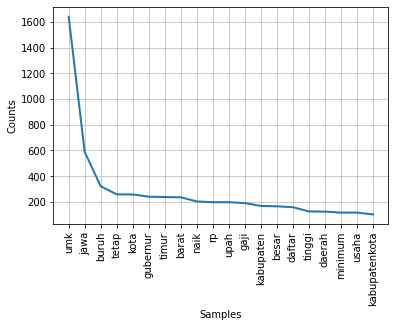

In [129]:
# Visualisasi

fqdist.plot(20,cumulative=False)
plt.show()  

Distribusi N-Gram

In [130]:
result = pd.Series(nltk.ngrams(list_word, 2)).value_counts()[:20]
print(result)

(jawa, timur)               232
(jawa, barat)               227
(umk, jawa)                 169
(naik, umk)                 127
(upah, minimum)             116
(tetap, umk)                113
(besar, umk)                 98
(gaji, umk)                  79
(gubernur, jawa)             77
(daftar, umk)                73
(umk, kabupaten)             65
(ridwan, kamil)              64
(daftar, lengkap)            62
(umk, kota)                  59
(rp, ribu)                   56
(kota, bekas)                47
(umk, kabupatenkota)         47
(minimum, kabupatenkota)     41
(umk, buruh)                 40
(kabupatenkota, umk)         40
dtype: int64
